# Figures for Paper

## ECCO (as same period as SOSE)

In [1]:
from dask_gateway import Gateway
g = Gateway()
cluster = g.connect(g.list_clusters()[0].name)
client = cluster.get_client()

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [2]:
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.970c44bff4e341859d3549daac8de5fa/status,


In [3]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline
from fastjmd95 import jmd95numba
import json

In [4]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [5]:
wmt_budget_terms = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ECCO/datasets/wmt_budget_terms.zarr'))
wmt_budget_terms.load()

/tmp/ipykernel_348/560759331.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  wmt_budget_terms = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ECCO/datasets/wmt_budget_terms.zarr'))


<xarray.Dataset>
Dimensions:               (time: 288, sigma2_bin: 999)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 1992-01-15 ... 2015-12-14
    time_snp              (time) datetime64[ns] NaT 1992-03-01 ... NaT
Data variables: (12/17)
    R1                    (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    R2                    (time, sigma2_bin) float64 6.155e+04 6.155e+04 ... 0.0
    dVdt                  (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    omega_mix             (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_mix_slt         (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_mix_th          (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...                    ...
    omega_total_th        (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    omega_trans_rate      (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    omega_trans_rate_slt  (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    omega_trans_rate_th   (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    psi_adv               (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    psi_vel               (time, sigma2_bin) float64 nan nan nan ... nan nan nan

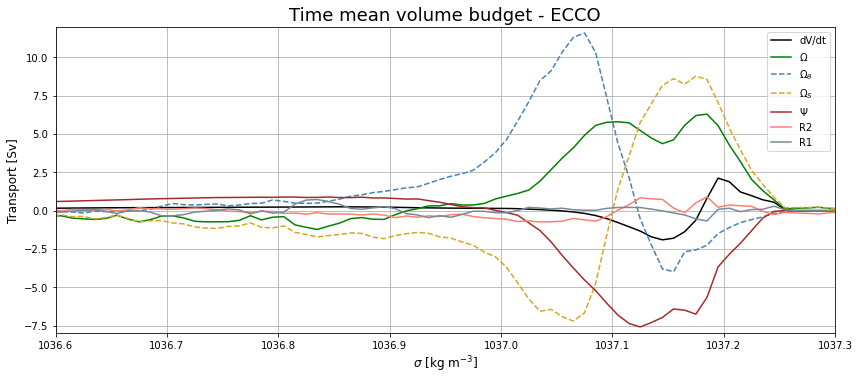

In [6]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$', color='green')
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue', linestyle='dashed')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod', linestyle='dashed')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
#plt.xlim(1037, 1037.255)
plt.xlim(1036.6, 1037.3)
plt.ylim(-8, 12)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title('Time mean volume budget - ECCO', fontsize=18);

![Water masses time mean WMT budget](ECCO-WMT.jpg)

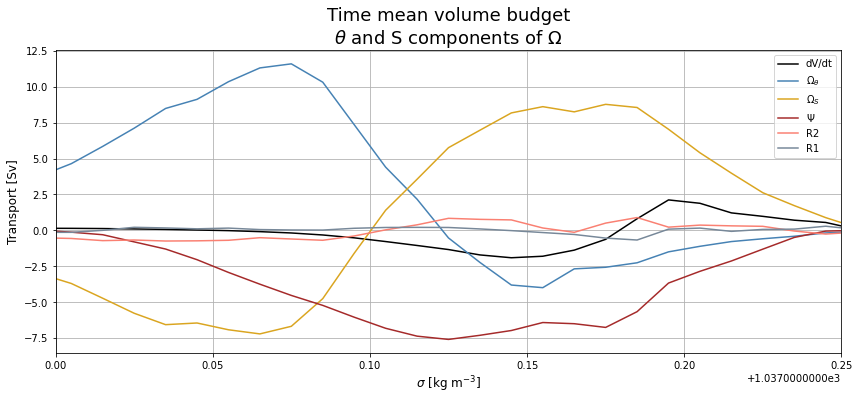

In [7]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
#plt.ylim(-12, 12)
#plt.xlim(1036.5, 1037.3)
plt.xlim(1037, 1037.25)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title("Time mean volume budget\n" r'$\theta$ and S components of $\Omega$', fontsize=18);

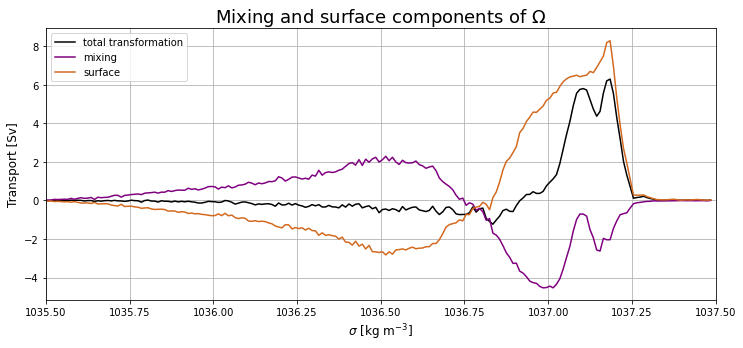

In [8]:
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(figsize=(12,5), label='total transformation', color='k')#, marker='.')
(wmt_budget_terms.omega_mix/1e6).mean(dim='time').plot(label='mixing', color='purple')
(wmt_budget_terms.omega_surf/1e6).mean(dim='time').plot(label='surface', color='chocolate')
plt.legend()
plt.grid()
plt.xlim(1035.5, 1037.5)
#plt.ylim(-6, 6)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Mixing and surface components of $\Omega$', fontsize=18);

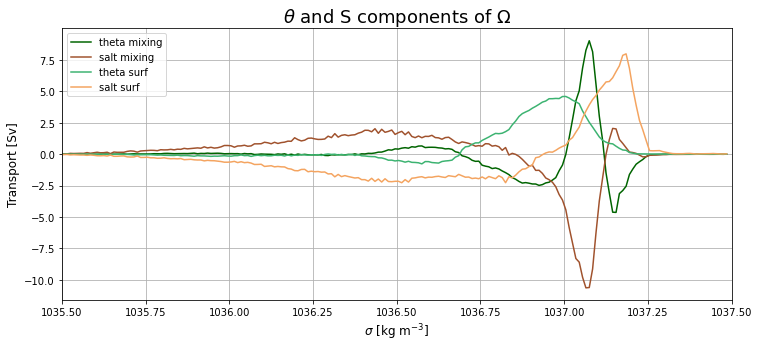

In [9]:
(wmt_budget_terms.omega_mix_th/1e6).mean(dim='time').plot(figsize=(12,5), label='theta mixing', color='darkgreen')
(wmt_budget_terms.omega_mix_slt/1e6).mean(dim='time').plot(label='salt mixing', color='sienna')
(wmt_budget_terms.omega_surf_th/1e6).mean(dim='time').plot(label='theta surf', color='mediumseagreen')
(wmt_budget_terms.omega_surf_slt/1e6).mean(dim='time').plot(label='salt surf', color='sandybrown')
plt.legend()
plt.grid()
plt.xlim(1035.5, 1037.5)
#plt.ylim(-10, 10)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'$\theta$ and S components of $\Omega$', fontsize=18);

In [10]:
def anom(da):
    clim = da.groupby('time.month').mean(dim='time')
    anom = da.groupby('time.month') - clim
    #anom_chunk = anom.chunk({'time':12})
    anom_rolled = anom.rolling(time=12).mean(dim='time') #yearly rolling mean to remove seasonal cycle
    return anom_rolled

In [11]:
anom_ds = xr.merge([wmt_budget_terms.dVdt.rename('dVdt'), wmt_budget_terms.R1.rename('R1'), 
                    wmt_budget_terms.psi_vel.rename('psi_vel'), wmt_budget_terms.R2.rename('R2'), 
                    wmt_budget_terms.omega_trans_rate.rename('omega_trans_rate'), 
                    wmt_budget_terms.omega_surf_slt.rename('omega_surf_slt'),
                    wmt_budget_terms.omega_surf_th.rename('omega_surf_th'), 
                    wmt_budget_terms.omega_mix.rename('omega_mix')])


In [12]:
def clim(da):
    clim = da.groupby('time.month').mean(dim='time')
    #anom_rolled = anom.rolling(time=12).mean(dim='time')
    return clim

In [13]:
clim_ds = anom_ds

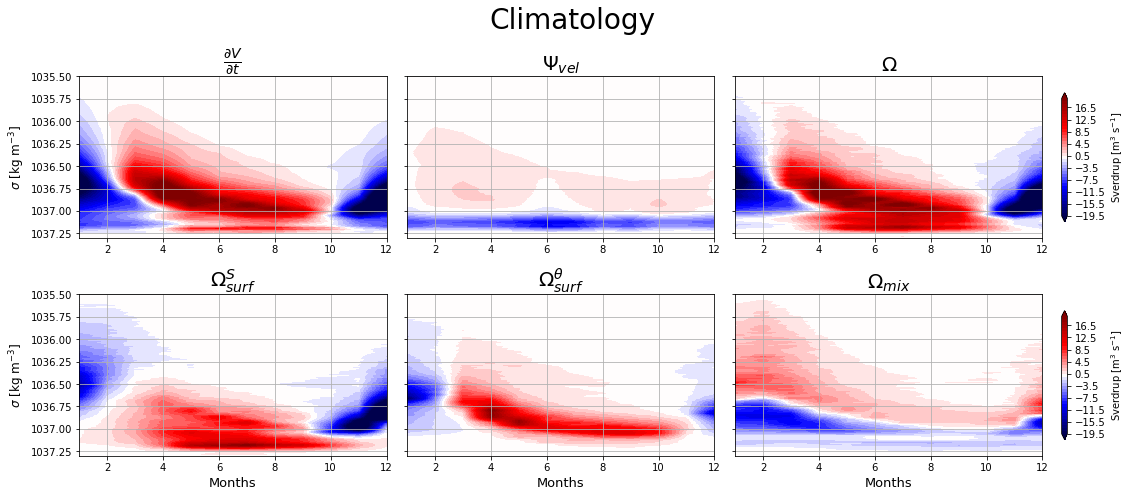

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

levels = np.arange(-20, 20) + 0.5

dVdt_clim = clim(clim_ds.dVdt) / 1e6
c = ax[0,0].contourf(dVdt_clim.month, 
                   dVdt_clim.sigma2_bin, 
                   dVdt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax[0,0].set_ylim(1037.3, 1035.5)
#ax[0,0].set_xlim(xmin='1993')
ax[0,0].grid()

psi_vel_clim = clim(clim_ds.psi_vel) / 1e6
c_psi = ax[0,1].contourf(psi_vel_clim.month, psi_vel_clim.sigma2_bin, psi_vel_clim.T,
                         cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
ax[0,1].set_ylim(1037.3, 1035.5)
#ax[0,1].set_xlim(xmin='1993')
ax[0,1].grid()

omega_clim = clim(clim_ds.omega_trans_rate) /1e6
c_omega = ax[0,2].contourf(omega_clim.month, omega_clim.sigma2_bin, omega_clim.T,
                           cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax[0,2].set_title(r'$\Omega$', fontsize=20)
ax[0,2].set_ylim(1037.3, 1035.5)
#ax[0,2].set_xlim(xmin='1993')
ax[0,2].grid()

omega_surf_slt_clim = clim(clim_ds.omega_surf_slt)/1e6
c_surf_slt = ax[1,0].contourf(omega_surf_slt_clim.month, 
                                omega_surf_slt_clim.sigma2_bin, 
                                omega_surf_slt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_slt, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[1,0])
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Months', fontsize=13)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
ax[1,0].set_ylim(1037.3, 1035.5)
#ax[1,0].set_xlim(xmin='1993')
ax[1,0].grid()

omega_surf_th_clim = clim(clim_ds.omega_surf_th) /1e6
c_surf_th = ax[1,1].contourf(omega_surf_th_clim.month, omega_surf_th_clim.sigma2_bin, 
                        omega_surf_th_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_th, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[1,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,1].set_xlabel('Months', fontsize=13)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
ax[1,1].set_ylim(1037.3, 1035.5)
#ax[1,1].set_xlim(xmin='1993')
ax[1,1].grid()

omega_mix__clim = clim(clim_ds.omega_mix) / 1e6
c_mix = ax[1,2].contourf(omega_mix__clim.month, omega_mix__clim.sigma2_bin, omega_mix__clim.T, 
                        cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
#ax[1,2].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,2].set_xlabel('Months', fontsize=13)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
ax[1,2].set_ylim(1037.3, 1035.5)
#ax[1,2].set_xlim(xmin='1993')
ax[1,2].grid()

plt.suptitle('Climatology', fontsize=28)
plt.tight_layout();

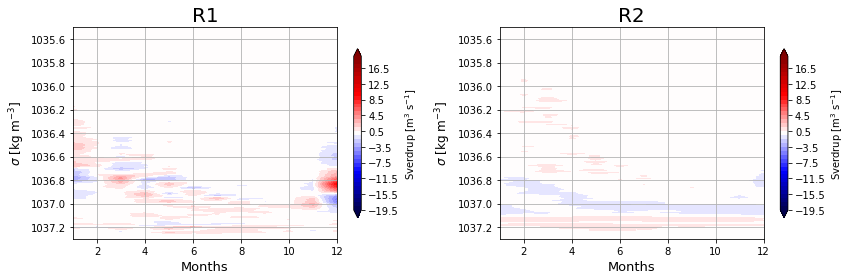

In [15]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

levels = np.arange(-20, 20) + 0.5

R1_clim = clim(clim_ds.R1) / 1e6
c = ax0.contourf(R1_clim.month, 
                   R1_clim.sigma2_bin, 
                   R1_clim.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax0)
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax0.set_xlabel('Months', fontsize=13)
ax0.set_title('R1', fontsize=20)
ax0.set_ylim(1037.3, 1035.5)
ax0.grid()

R2_clim = clim(clim_ds.R2) / 1e6
c = ax1.contourf(R2_clim.month, 
                   R2_clim.sigma2_bin, 
                   R2_clim.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax1)
ax1.set_xlabel('Months', fontsize=13)
ax1.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax1.set_title('R2', fontsize=20)
ax1.set_ylim(1037.3, 1035.5)
ax1.grid()

plt.tight_layout();

In [16]:
anom_ds.dVdt.time[240]

<xarray.DataArray 'time' ()>
array('2012-01-15T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time      datetime64[ns] 2012-01-15
    time_snp  datetime64[ns] 2012-02-01

In [17]:
20*12

240

In [18]:
np.arange(0,23,5)

array([ 0,  5, 10, 15, 20])

In [19]:
year_start_index = list(np.arange(0, 23, 5) * 12) #[0, 12, 24, 36, 48, ]

In [20]:
year_start_index

[0, 60, 120, 180, 240]

In [21]:
dVdt_anom_rolled.time.values[year_start_index]

NameError: name 'dVdt_anom_rolled' is not defined

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})#, sharex=True)

dVdt_anom_rolled = anom(anom_ds.dVdt) / 1e6
c = ax[0,0].pcolormesh(dVdt_anom_rolled.time, 
                   dVdt_anom_rolled.sigma2_bin, 
                   dVdt_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax[0,0].set_ylim(1037.3, 1036.5)
ax[0,0].set_xticks(dVdt_anom_rolled.time.values[year_start_index])
#ax[0,0].set_xticklabels(np.arange(2006, 2011))
ax[0,0].grid()

psi_vel_anom_rolled = anom(anom_ds.psi_vel) / 1e6
c_psi = ax[0,1].pcolormesh(psi_vel_anom_rolled.time, psi_vel_anom_rolled.sigma2_bin, psi_vel_anom_rolled.T,
                        vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
ax[0,1].set_ylim(1037.3, 1036.5)
ax[0,1].set_xticks(psi_vel_anom_rolled.time.values[year_start_index])
#ax[0,1].set_xticklabels(np.arange(2006, 2011))
ax[0,1].grid()

omega_anom_rolled = anom(anom_ds.omega_trans_rate) /1e6
c_omega = ax[0,2].pcolormesh(omega_anom_rolled.time, omega_anom_rolled.sigma2_bin, omega_anom_rolled.T,
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax[0,2].set_title(r'$\Omega$', fontsize=20)
ax[0,2].set_ylim(1037.3, 1036.5)
ax[0,2].set_xticks(omega_anom_rolled.time.values[year_start_index])
#ax[0,2].set_xticklabels(np.arange(2006, 2011))
ax[0,2].grid()

omega_surf_slt_anom_rolled = anom(anom_ds.omega_surf_slt)/1e6
c_surf_slt = ax[1,0].pcolormesh(omega_surf_slt_anom_rolled.time, 
                                omega_surf_slt_anom_rolled.sigma2_bin, 
                                omega_surf_slt_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_surf_slt, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[1,0])
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Time', fontsize=13)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
ax[1,0].set_ylim(1037.3, 1036.5)
ax[1,0].set_xticks(omega_surf_slt_anom_rolled.time.values[year_start_index])
#ax[1,0].set_xticklabels(np.arange(2006, 2011))
ax[1,0].grid()

omega_surf_th_anom_rolled = anom(anom_ds.omega_surf_th) /1e6
c_surf_th = ax[1,1].pcolormesh(omega_surf_th_anom_rolled.time, omega_surf_th_anom_rolled.sigma2_bin, 
                        omega_surf_th_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_surf_th, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[1,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,1].set_xlabel('Time', fontsize=13)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
ax[1,1].set_ylim(1037.3, 1036.5)
ax[1,1].set_xticks(omega_surf_th_anom_rolled.time.values[year_start_index])
#ax[1,1].set_xticklabels(np.arange(2006, 2011))
ax[1,1].grid()

omega_mix_anom_rolled = anom(anom_ds.omega_mix) / 1e6
c_mix = ax[1,2].pcolormesh(omega_mix_anom_rolled.time, omega_mix_anom_rolled.sigma2_bin, omega_mix_anom_rolled.T, 
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
#ax[1,2].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,2].set_xlabel('Time', fontsize=13)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
ax[1,2].set_ylim(1037.3, 1036.5)
ax[1,2].set_xticks(omega_mix_anom_rolled.time.values[year_start_index])
#ax[1,2].set_xticklabels(np.arange(2006, 2011))
ax[1,2].grid()

plt.suptitle('Anomalous WMT budget - ECCO', fontsize=28)
plt.tight_layout();

## Loading in Sea ice, SAM, ENSO timeseries

In [ ]:
ecco = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/ECCO/datasets/ecco_si_index.zarr'))
sam = xr.open_dataarray('/home/jovyan/WMT-project/Climate-Indices/SAM-index/sam_index')
enso = xr.open_dataarray('/home/jovyan/WMT-project/Climate-Indices/ENSO-index/oni')

In [ ]:
enso.sel(time=slice('1992', '2015'))

In [ ]:
ecco.time

In [ ]:
enso_ecco_time = enso.sel(time=slice('1992', '2015')).assign_coords(coords={'time':ecco.time}).drop(['month', 'k'])
enso_ecco_time

In [ ]:
sam.sel(time=slice('1992', '2015'))

In [ ]:
sam_ecco_time = sam.sel(time=slice('1992', '2015')).assign_coords(coords={'time':ecco.time}).drop(['month', 'k'])
sam_ecco_time

In [ ]:
plt.figure(figsize=(12,5))
enso_ecco_time.sel(time=slice('1992', '2015')).plot(color='green', label='NINO3.4')
sam_ecco_time.rolling(time=12).mean().plot(color='red', label='SAM') #12mth rolling mean
ecco.ecco_si_index.plot(color='k', label='ECCO SI')
plt.legend()
plt.grid()
plt.ylim(-3,4) #ylims with rolling mean
#plt.ylim(-6,6) #ylims without rolling mean
#plt.xlim('1992-01-01', '2015-12-01')
plt.title('SI/NINO3.4/SAM indices', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('');

## Windstress indices

In [ ]:
ds = xr.open_zarr(gcsfs.GCSFileSystem(requester_pays=True).get_mapper('pangeo-ecco-eccov4r3/eccov4r3'), consolidated=True)

ds_ll = faces_dataset_to_latlon(ds)

ds_before_drop = ds_ll.roll(i=50, i_g=50)

ds = ds_before_drop.drop(['i', 'j', 'i_g', 'j_g', 'k_u', 'k_l', 'k_p1'])

#WG boundaries (65˚W, 30˚E; 80˚S, 55˚S)
left_lon = 23 #~-64.5˚ #used to be 20
right_lon = 118 #30.5˚ #used to be 115
lower_lat = 30 #~-80˚ #used to be 38
upper_lat = 80 #-61.755745# 93 #-55.107994˚
j_g_lower = 31
j_g_upper = 81
i_g_right = 119
i_g_left = 24

#set the boundaries
lat_range = dict(j=slice(lower_lat, upper_lat), j_g=slice(j_g_lower, j_g_upper))
lon_range = dict(i=slice(left_lon, right_lon), i_g=slice(i_g_left, i_g_right))

#set the boundaries
lat_range_noface = dict(j=slice(lower_lat, upper_lat))
lon_range_noface = dict(i=slice(left_lon, right_lon))

In [ ]:
ds_wg = ds.isel(**lat_range, **lon_range)

In [ ]:
ds_wg

In [ ]:
ds_wg.oceTAUX

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3))
ds_wg.oceTAUX.mean(dim='time').plot(ax=ax1)
ds_wg.oceTAUY.mean(dim='time').plot(ax=ax2)
plt.tight_layout();

In [ ]:
weighted_taux = ds_wg.oceTAUX * ds_wg.rAw
weighted_tauy = ds_wg.oceTAUY * ds_wg.rAs

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3))
weighted_taux.mean(dim='time').plot(ax=ax1)
weighted_tauy.mean(dim='time').plot(ax=ax2)
plt.tight_layout();

In [ ]:
taux_anom = (weighted_taux.resample(time='MS').mean().groupby('time.month') 
             - weighted_taux.resample(time='MS').mean().groupby('time.month').mean('time'))
tauy_anom = (weighted_tauy.resample(time='MS').mean().groupby('time.month') 
             - weighted_tauy.resample(time='MS').mean().groupby('time.month').mean('time'))

In [ ]:
tauy_anom

In [ ]:
taux_index = taux_anom.sum(['j','i_g'])/taux_anom.sum(['j','i_g']).std(dim='time')
tauy_index = tauy_anom.sum(['j_g','i'])/tauy_anom.sum(['j_g','i']).std(dim='time')

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3))
taux_index.plot(ax=ax1)
tauy_index.plot(ax=ax2)
plt.tight_layout();

## Windstress curl indices

$$ \frac{\partial \tau_y}{\partial x} - \frac{\partial \tau_x}{\partial y}$$

In [ ]:
import xgcm

grid = xgcm.Grid(ds_wg, coords={'X': {'center': 'i', 'right': 'i_g'}, 
                              'Y': {'center': 'j', 'right': 'j_g'},
                              'T': {'center': 'time'}},
                      periodic=['X'])
grid

In [ ]:
#calculating meters per latitudinal & longitudinal degree
earth_radius = 6.371e6
earth_circumference = 2*np.pi*earth_radius
meters_per_degree = earth_circumference / 360

#converting lat from degrees to meters
delta_lat = grid.diff(ds_wg.j, 'Y', boundary='fill', fill_value=np.nan)
dy = delta_lat * meters_per_degree

#converting degrees lon to lon [meters] (pinching at the poles)
delta_lon = grid.diff(ds_wg.i, 'X')#, boundary_discontinuity=360)
dx = delta_lon * meters_per_degree * np.cos(np.deg2rad(ds_wg.j))

In [ ]:
dy

In [ ]:
dx

In [ ]:
weighted_tauy

In [ ]:
dtauy = grid.diff(weighted_tauy, 'X')
dtaux = grid.diff(weighted_taux, 'Y', boundary='fill', fill_value=np.nan)

In [ ]:
dtaux

In [ ]:
dx_interp = grid.interp(dx, 'Y', boundary='fill', fill_value=np.nan)

In [ ]:
dx_interp

In [ ]:
windstress_curl = (dtauy / dx_interp) - (dtaux/dy)
windstress_curl

In [ ]:
windstress_curl_anom = windstress_curl.groupby('time.month') - windstress_curl.groupby('time.month').mean('time')
windstress_curl_anom

In [ ]:
windstress_curl_anom.sum(['i_g', 'j_g']).plot()

In [ ]:
windstress_curl_index = windstress_curl_anom.sum(['i_g','j_g'])/windstress_curl_anom.sum(['i_g','j_g']).std(dim='time')
windstress_curl_index

In [ ]:
windstress_curl_index.plot()

## Water mass classes timeseries

In [ ]:
import sys
#telling python where the module lives
sys.path.insert(0, '/home/jovyan/WMT-project/')
from sum_wm_bins import sum_wm_bins

In [ ]:
wm_type = ['cdw', 'wsdw', 'wsbw', 'isw']

wmt_terms = [dVdt_anom_rolled, psi_vel_anom_rolled, omega_anom_rolled, omega_surf_slt_anom_rolled,
             omega_surf_th_anom_rolled, omega_mix_anom_rolled]

term_names = ['dVdt_anom_rolled', 'psi_vel_anom_rolled', 'omega_anom_rolled', 'omega_surf_slt_anom_rolled',
             'omega_surf_th_anom_rolled', 'omega_mix_anom_rolled']

In [ ]:
def datasetmaker(wm_term):
    """Creating new ds for each wmt budget term with wm classes as variables."""
    new_ds = xr.Dataset({'cdw': sum_wm_bins(wm_term, 'cdw'), 'wsdw':sum_wm_bins(wm_term, 'wsdw'),
                           'wsbw': sum_wm_bins(wm_term, 'wsbw'), 'isw': sum_wm_bins(wm_term, 'isw')}, attrs=dict(Name=wm_term.name))
    return new_ds

In [ ]:
wmt_terms[0].name

In [ ]:
term_names[0]

In [ ]:
k=0
for term in (wmt_terms):
    term_names[k] = datasetmaker(term)
    k=k+1

In [ ]:
term_names[0].attrs.get('Name')

In [ ]:
len(term_names)

In [ ]:
#trying to assign vars with term_names at end of name for each ds in term_names
F"wm_ds_{term_names[5].attrs.get('Name')}" #= term_names[0]

In [ ]:
term_names[0]

In [ ]:
wm_ds_dVdt = (term_names[0]/term_names[0].std('time')).drop(['month', 'time_snp'])
wm_ds_psi_vel = (term_names[1]/term_names[1].std('time')).drop(['month', 'time_snp'])
wm_ds_omega_trans_rate = (term_names[2]/term_names[2].std('time')).drop(['month', 'time_snp'])
wm_ds_omega_surf_slt = (term_names[3]/term_names[3].std('time')).drop(['month', 'time_snp'])
wm_ds_omega_surf_th = (term_names[4]/term_names[4].std('time')).drop(['month', 'time_snp'])
wm_ds_omega_mix = (term_names[5]/term_names[5].std('time')).drop(['month', 'time_snp'])

In [ ]:
wm_ds_dVdt

## Visualize timeseries of wmt terms in wm classes, [seaice, sam, enso indices]

In [ ]:
# For Visualization
import panel as pn
import holoviews as hv
from holoviews import opts
import geoviews as gv

import pandas as pd
import param as pm

## Import hvplot apis for xarray and pandas
import hvplot.xarray
import hvplot.pandas

In [ ]:
wm_ds_dVdt.cdw.plot()

In [ ]:
(wm_ds_dVdt.cdw/wm_ds_dVdt.cdw.std('time')).plot()

In [ ]:
#dVdt
show__dVdt1 = pn.widgets.Checkbox(name='CDW-dVdt')
show__dVdt2 = pn.widgets.Checkbox(name='WSDW-dVdt')
show__dVdt3 = pn.widgets.Checkbox(name='WSBW-dVdt')
show__dVdt4 = pn.widgets.Checkbox(name='ISW-dVdt')

dVdt_plot1 = wm_ds_dVdt.cdw.hvplot(ylabel='Sv', title= 'dVdt = Psi + Omega', grid=True)
dVdt_plot2 = wm_ds_dVdt.wsdw.hvplot()
dVdt_plot3 = wm_ds_dVdt.wsbw.hvplot()
dVdt_plot4 = wm_ds_dVdt.isw.hvplot()

#Psi
show__psi1 = pn.widgets.Checkbox(name='CDW-psi')
show__psi2 = pn.widgets.Checkbox(name='WSDW-psi')
show__psi3 = pn.widgets.Checkbox(name='WSBW-psi')
show__psi4 = pn.widgets.Checkbox(name='ISW-psi')

psi_plot1 = wm_ds_psi_vel.cdw.hvplot()
psi_plot2 = wm_ds_psi_vel.wsdw.hvplot()
psi_plot3 = wm_ds_psi_vel.wsbw.hvplot()
psi_plot4 = wm_ds_psi_vel.isw.hvplot()

#omega
show__omega1 = pn.widgets.Checkbox(name='CDW-omega')
show__omega2 = pn.widgets.Checkbox(name='WSDW-omega')
show__omega3 = pn.widgets.Checkbox(name='WSBW-omega')
show__omega4 = pn.widgets.Checkbox(name='ISW-omega')

omega_plot1 = wm_ds_omega_trans_rate.cdw.hvplot()
omega_plot2 = wm_ds_omega_trans_rate.wsdw.hvplot()
omega_plot3 = wm_ds_omega_trans_rate.wsbw.hvplot()
omega_plot4 = wm_ds_omega_trans_rate.isw.hvplot()

#omega_mix
show__omega_mix1 = pn.widgets.Checkbox(name='CDW-omega_mix')
show__omega_mix2 = pn.widgets.Checkbox(name='WSDW-omega_mix')
show__omega_mix3 = pn.widgets.Checkbox(name='WSBW-omega_mix')
show__omega_mix4 = pn.widgets.Checkbox(name='ISW-omega_mix')

omega_mix_plot1 = wm_ds_omega_mix.cdw.hvplot()
omega_mix_plot2 = wm_ds_omega_mix.wsdw.hvplot()
omega_mix_plot3 = wm_ds_omega_mix.wsbw.hvplot()
omega_mix_plot4 = wm_ds_omega_mix.isw.hvplot()

#omega_surf_slt
show__slt1 = pn.widgets.Checkbox(name='CDW-omega_surf_SLT')
show__slt2 = pn.widgets.Checkbox(name='WSDW-omega_surf_SLT')
show__slt3 = pn.widgets.Checkbox(name='WSBW-omega_surf_SLT')
show__slt4 = pn.widgets.Checkbox(name='ISW-omega_surf_SLT')

omega_slt_plot1 = wm_ds_omega_surf_slt.cdw.hvplot()
omega_slt_plot2 = wm_ds_omega_surf_slt.wsdw.hvplot()
omega_slt_plot3 = wm_ds_omega_surf_slt.wsbw.hvplot()
omega_slt_plot4 = wm_ds_omega_surf_slt.isw.hvplot()

#omega_surf_th
show__th1 = pn.widgets.Checkbox(name='CDW-omega_surf_TH')
show__th2 = pn.widgets.Checkbox(name='WSDW-omega_surf_TH')
show__th3 = pn.widgets.Checkbox(name='WSBW-omega_surf_TH')
show__th4 = pn.widgets.Checkbox(name='ISW-omega_surf_TH')

omega_th_plot1 = wm_ds_omega_surf_th.cdw.hvplot()
omega_th_plot2 = wm_ds_omega_surf_th.wsdw.hvplot()
omega_th_plot3 = wm_ds_omega_surf_th.wsbw.hvplot()
omega_th_plot4 = wm_ds_omega_surf_th.isw.hvplot()

#Indices
show__ENSO = pn.widgets.Checkbox(name='ENSO')
show__SAM = pn.widgets.Checkbox(name='SAM')
show__ECCO = pn.widgets.Checkbox(name='ECCO')

enso_plot = enso_ecco_time.hvplot()
sam_plot = sam_ecco_time.rename('zonal mean SLP anom').hvplot()
ecco_plot = ecco.ecco_si_index.drop(['month', 'k']).hvplot()


@pn.depends(show__dVdt1.param.value, show__dVdt2.param.value, show__dVdt3.param.value, show__dVdt4.param.value,
            show__psi1.param.value, show__psi2.param.value, show__psi3.param.value, show__psi4.param.value,
            show__omega1.param.value, show__omega2.param.value, show__omega3.param.value, show__omega4.param.value,
            show__omega_mix1.param.value, show__omega_mix2.param.value, show__omega_mix3.param.value, show__omega_mix4.param.value,
            show__slt1.param.value, show__slt2.param.value, show__slt3.param.value, show__slt4.param.value,
            show__th1.param.value, show__th2.param.value, show__th3.param.value, show__th4.param.value,
            show__ENSO.param.value, show__ECCO.param.value, show__SAM.param.value)


def get_plot(dVdt1, dVdt2, dVdt3, dVdt4,
             psi1, psi2, psi3, psi4,
             omega1, omega2, omega3, omega4,
             omega_mix1, omega_mix2, omega_mix3, omega_mix4,
             omega_slt1, omega_slt2, omega_slt3, omega_slt4,
             omega_th1, omega_th2, omega_th3, omega_th4, enso, ecco, sam):
    return (dVdt_plot1.opts(alpha=0.9*dVdt1)*dVdt_plot2.opts(alpha=0.9*dVdt2)*dVdt_plot3.opts(alpha=0.9*dVdt3)*dVdt_plot4.opts(alpha=0.9*dVdt4)*
            psi_plot1.opts(alpha=0.9*psi1)*psi_plot2.opts(alpha=0.9*psi2)*psi_plot3.opts(alpha=0.9*psi3)*psi_plot4.opts(alpha=0.9*psi4)*
            omega_plot1.opts(alpha=0.9*omega1)*omega_plot2.opts(alpha=0.9*omega2)*omega_plot3.opts(alpha=0.9*omega3)*omega_plot4.opts(alpha=0.9*omega4)
            *omega_mix_plot1.opts(alpha=0.9*omega_mix1)*omega_mix_plot2.opts(alpha=0.9*omega_mix2)*
            omega_mix_plot3.opts(alpha=0.9*omega_mix3)*omega_mix_plot4.opts(alpha=0.9*omega_mix4)*
            omega_slt_plot1.opts(alpha=0.9*omega_slt1)*omega_slt_plot2.opts(alpha=0.9*omega_slt2)*
            omega_slt_plot3.opts(alpha=0.9*omega_slt3)*omega_slt_plot4.opts(alpha=0.9*omega_slt4)*
            omega_th_plot1.opts(alpha=0.9*omega_th1)*omega_th_plot2.opts(alpha=0.9*omega_th2)*
            omega_th_plot3.opts(alpha=0.9*omega_th3)*omega_th_plot4.opts(alpha=0.9*omega_th4)*
            enso_plot.opts(alpha=0.9*enso)*ecco_plot.opts(alpha=0.9*ecco)*sam_plot.opts(alpha=0.9*sam))

In [ ]:
pn.Row(pn.Column(show__dVdt1, show__dVdt2, show__dVdt3, show__dVdt4, 
                 show__psi1, show__psi2, show__psi3, show__psi4,
                 show__omega1, show__omega2, show__omega3, show__omega4,
                 show__omega_mix1, show__omega_mix2, show__omega_mix3, show__omega_mix4,
                 show__slt1, show__slt2, show__slt3, show__slt4,
                 show__th1, show__th2, show__th3, show__th4, show__ENSO, show__ECCO, show__SAM,
                 width=150, max_height=250, height_policy='max', scroll=True), 
                 get_plot, scroll=True)

## Turn wmt terms and indices into dataframes for `pd.corr()` heatmap of correlation matrix

In [ ]:
wm_ds_dVdt

In [ ]:
wm_ds_dVdt.time

In [ ]:
dVdt_df = wm_ds_dVdt.to_dataframe()
psi_df = wm_ds_psi_vel.to_dataframe()
omega_df = wm_ds_omega_trans_rate.to_dataframe()
omega_mix_df = wm_ds_omega_mix.to_dataframe()
omega_slt_df = wm_ds_omega_surf_slt.to_dataframe()
omega_th_df = wm_ds_omega_surf_th.to_dataframe()
dVdt_df.head()

In [ ]:
dVdt_df.index

In [ ]:
windstress_curl_index

In [ ]:
enso_ecco_time

In [ ]:
indices = xr.merge([sam_ecco_time.rename('sam'), enso_ecco_time.rename('enso'), 
                    ecco.ecco_si_index.rename('ecco'), 
                    windstress_curl_index.rename('windstress_curl')]).drop(['month', 'k'])
indices

In [ ]:
indices_df = indices.to_dataframe()
indices_df.head()

In [ ]:
corr_indices = indices_df.corr()
corr_indices

In [ ]:
pd.concat([dVdt_df, indices_df], axis=1).head()

In [ ]:
dVdt_ind = pd.concat([dVdt_df, indices_df], axis=1)
psi_ind = pd.concat([psi_df, indices_df], axis=1)
omega_ind = pd.concat([omega_df, indices_df], axis=1)
omega_mix_ind = pd.concat([omega_mix_df, indices_df], axis=1)
omega_slt_ind = pd.concat([omega_slt_df, indices_df], axis=1)
omega_th_ind = pd.concat([omega_th_df, indices_df], axis=1)

In [ ]:
omega_th_ind.head()

In [ ]:
dVdt_corr = dVdt_ind.corr()
psi_corr = psi_ind.corr()
omega_corr = omega_ind.corr()
omega_mix_corr = omega_mix_ind.corr()
omega_slt_corr = omega_slt_ind.corr()
omega_th_corr = omega_th_ind.corr()

### Create heatmap of correlation matrices

In [ ]:
import seaborn as sn

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8), sharex=True, sharey=True)

sn.heatmap(dVdt_corr, annot=True, ax=ax[0,0])
ax[0,0].set_title(r'Correlation - $\frac{dV}{dt}$')

sn.heatmap(psi_corr, annot=True, ax=ax[0,1])
ax[0,1].set_title(r'Correlation - $\Psi$')

sn.heatmap(omega_corr, annot=True, ax=ax[0,2])
ax[0,2].set_title(r'Correlation - $\Omega$')

sn.heatmap(omega_slt_corr, annot=True, ax=ax[1,0])
ax[1,0].set_title(r'Correlation - $\Omega_{surf-slt}$')

sn.heatmap(omega_th_corr, annot=True, ax=ax[1,1])
ax[1,1].set_title(r'Correlation - $\Omega_{surf-th}$')

sn.heatmap(omega_mix_corr, annot=True, ax=ax[1,2])
ax[1,2].set_title(r'Correlation - $\Omega_{mix}$');